In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from RBM import *
from principal_DNN_mnist import *
from pathlib import Path

In [2]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Variable binaire
train_X = train_X > 127
test_X  = test_X > 127

# Reshape pour respect le format attendu par le modéle
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1]*train_X.shape[2])
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1]*test_X.shape[2])


tmp = np.zeros((test_y.shape[0],10))
tmp_2 = np.zeros((train_y.shape[0],10))

for i in range(len(test_y)):
    tmp[i, test_y[i]-1] = 1

for i in range(len(train_y)):
    tmp_2[i, train_y[i]-1] = 1
test_y = tmp
train_y = tmp_2

del tmp, tmp_2

2022-04-17 03:08:58.208830: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-17 03:08:58.208848: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
size = 0.8
#Pick 50% to data in our work
train_idx = np.random.randint(0, train_X.shape[0], int(train_X.shape[0]*size))
test_idx = np.random.randint(0, test_X.shape[0], int(test_X.shape[0]*size))

X_train = train_X[train_idx]*1.0
Y_train = train_y[train_idx]

# X_test  = test_X[cut_:int(1.3*cut_)]
# Y_test  = test_y[cut_:int(1.3*cut_)]
X_test  = test_X[test_idx]*1.0
Y_test  = test_y[test_idx]

In [4]:
print(X_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.

In [5]:
n_epoch_pre_train = 100
n_epoch_train     = 200
lr                = 0.1
batch_size        = 64
p                 = X_train.shape[1]
n_classe          = Y_train.shape[1]
hid_layers        = [100, 200]

In [6]:
DNN_ = DNN(p, n_classe, hid_layers)

In [7]:
DNN_, hist = retropropagation(DNN_, input = X_train, label = Y_train, epochs = 100, lr = lr, batch_size = batch_size)

100%|███████████████████████████████████████████████████| 100/100 [00:31<00:00, 3.19it/s, loss =nan]


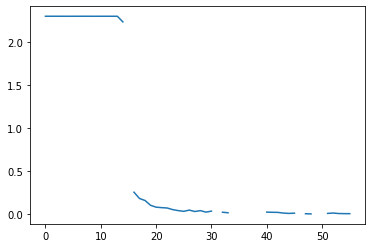

In [8]:
plt.plot(hist)

In [9]:
test_DNN(DNN_, X_test, Y_test)

We have an accuracy of 96.1% 
 and a entropy loss of 0.247


(0.24740436445701408, 0.961)